In [4]:
import pandas as pd

# Load the datasets
df_time_series = pd.read_csv('/content/new_time_series_data.csv')
df_processed = pd.read_csv('/content/time_series_programs_pivot.csv') # Corrected filename
df_index_processed = pd.read_csv('/content/aggregated_shelter_data_by_date_specific_cols.csv') # Corrected filename

# Function to convert common date/time columns to datetime objects
def convert_date_columns(df):
    date_cols = ['Date', 'date', 'Timestamp', 'timestamp', 'Time', 'time', 'Creation Date', 'OCCUPANCY_DATE'] # Added specific column names
    for col in date_cols:
        if col in df.columns:
            try:
                # Use errors='coerce' to turn unparseable dates into NaT (Not a Time)
                df[col] = pd.to_datetime(df[col], errors='coerce')
                print(f"Converted column '{col}' to datetime in DataFrame.")
            except Exception as e:
                print(f"Could not convert column '{col}' to datetime: {e}")
    return df

# Apply date conversion and display info for each DataFrame
print("Processing df_time_series:")
df_time_series = convert_date_columns(df_time_series)
print("\nnew_time_series_data.csv head:")
display(df_time_series.head())
print("\nnew_time_series_data.csv info:")
df_time_series.info() # Changed from display(df_time_series.info())

print("\nProcessing df_processed:")
df_processed = convert_date_columns(df_processed)
print("\ndf_processed.csv head:")
display(df_processed.head())
print("\ndf_processed.csv info:")
df_processed.info() # Changed from display(df_processed.info())

print("\nProcessing df_index_processed:")
df_index_processed = convert_date_columns(df_index_processed)
print("\ndf_index_processed.csv head:")
display(df_index_processed.head())
print("\ndf_index_processed.csv info:")
df_index_processed.info() # Changed from display(df_index_processed.info())

# Merge df_time_series and df_processed
df_merged = pd.merge(df_time_series, df_processed, on='Creation Date', how='outer')

# Rename 'OCCUPANCY_DATE' in df_index_processed to 'Creation Date' for merging
df_index_processed_renamed = df_index_processed.rename(columns={'OCCUPANCY_DATE': 'Creation Date'})

# Merge df_merged with df_index_processed_renamed
df_final = pd.merge(df_merged, df_index_processed_renamed, on='Creation Date', how='outer')

print("\nFinal Merged DataFrame head:")
display(df_final.head())
print("\nFinal Merged DataFrame info:")
df_final.info()

Processing df_time_series:
Converted column 'Creation Date' to datetime in DataFrame.

new_time_series_data.csv head:


,Creation Date,number of people
0,2021-02-27,6614.0
1,2021-02-28,4323.0
2,2021-03-01,2.0
3,2021-03-02,7.0
4,2021-03-03,4.0



new_time_series_data.csv info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Creation Date     1405 non-null   datetime64[ns]
 1   number of people  1405 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.1 KB

Processing df_processed:
Converted column 'Creation Date' to datetime in DataFrame.

df_processed.csv head:


,Creation Date,Asylum Integration Program (AIP),CNC/Precision Machining Skills Training Program,Community Connections - Group Activities,Community Connections - Mentorship,Employment Accessibility Services,Employment Ontario,Enhanced Language Training,Family Finance Clinic,Family Newcomer Services,...,Personalized Career Accelerator (PCA),Plumbing Pre-Apprenticeship Level 1 Program,Project: Income Transition Project,Tax Clinic,Tax Skills for Self-Employed Workers,Toronto Youth Job Corp,Visual Effects Compositing Program,Youth Housing Navigation and Subsidy Support Program,Youth Job Connections (YJC),Youth Job Connections Summer (YJC Summer)
0,2021-02-27,0.0,0.0,0.0,0.0,0.0,23.0,0.0,2.0,11.0,...,0.0,0.0,1.0,6499.0,2.0,0.0,1.0,0.0,0.0,0.0
1,2021-02-28,0.0,0.0,4.0,0.0,2.0,26.0,0.0,0.0,125.0,...,0.0,0.0,1.0,3938.0,4.0,0.0,0.0,0.0,0.0,0.0
2,2021-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-03-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-03-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0



df_processed.csv info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 29 columns):
 #   Column                                                                    Non-Null Count  Dtype         
---  ------                                                                    --------------  -----         
 0   Creation Date                                                             1405 non-null   datetime64[ns]
 1   Asylum Integration Program (AIP)                                          1405 non-null   float64       
 2   CNC/Precision Machining Skills Training Program                           1405 non-null   float64       
 3   Community Connections - Group Activities                                  1405 non-null   float64       
 4   Community Connections - Mentorship                                        1405 non-null   float64       
 5   Employment Accessibility Services                                         1405 non-null   floa

,OCCUPANCY_DATE,CAPACITY_ACTUAL_BED,CAPACITY_FUNDING_BED,OCCUPIED_BEDS,UNOCCUPIED_BEDS,UNAVAILABLE_BEDS,OCCUPANCY_RATE_BEDS
0,2021-01-01,758.0,758.0,758.0,0.0,0.0,2700.0
1,2021-01-02,888.0,888.0,888.0,0.0,0.0,3100.0
2,2021-01-03,668.0,668.0,668.0,0.0,0.0,2500.0
3,2021-01-04,678.0,678.0,678.0,0.0,0.0,2400.0
4,2021-01-05,716.0,716.0,716.0,0.0,0.0,2600.0



df_index_processed.csv info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780 entries, 0 to 1779
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   OCCUPANCY_DATE        1780 non-null   datetime64[ns]
 1   CAPACITY_ACTUAL_BED   1780 non-null   float64       
 2   CAPACITY_FUNDING_BED  1780 non-null   float64       
 3   OCCUPIED_BEDS         1780 non-null   float64       
 4   UNOCCUPIED_BEDS       1780 non-null   float64       
 5   UNAVAILABLE_BEDS      1780 non-null   float64       
 6   OCCUPANCY_RATE_BEDS   1780 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 97.5 KB

Final Merged DataFrame head:


,Creation Date,number of people,Asylum Integration Program (AIP),CNC/Precision Machining Skills Training Program,Community Connections - Group Activities,Community Connections - Mentorship,Employment Accessibility Services,Employment Ontario,Enhanced Language Training,Family Finance Clinic,...,Visual Effects Compositing Program,Youth Housing Navigation and Subsidy Support Program,Youth Job Connections (YJC),Youth Job Connections Summer (YJC Summer),CAPACITY_ACTUAL_BED,CAPACITY_FUNDING_BED,OCCUPIED_BEDS,UNOCCUPIED_BEDS,UNAVAILABLE_BEDS,OCCUPANCY_RATE_BEDS
0,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,758.0,758.0,758.0,0.0,0.0,2700.0
1,2021-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,888.0,888.0,888.0,0.0,0.0,3100.0
2,2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,668.0,668.0,668.0,0.0,0.0,2500.0
3,2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,678.0,678.0,678.0,0.0,0.0,2400.0
4,2021-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,716.0,716.0,716.0,0.0,0.0,2600.0



Final Merged DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780 entries, 0 to 1779
Data columns (total 36 columns):
 #   Column                                                                    Non-Null Count  Dtype         
---  ------                                                                    --------------  -----         
 0   Creation Date                                                             1780 non-null   datetime64[ns]
 1   number of people                                                          1405 non-null   float64       
 2   Asylum Integration Program (AIP)                                          1405 non-null   float64       
 3   CNC/Precision Machining Skills Training Program                           1405 non-null   float64       
 4   Community Connections - Group Activities                                  1405 non-null   float64       
 5   Community Connections - Mentorship                                        1405 non-null 

In [5]:
import pandas as pd

# Load the two specified datasets
df_shelter = pd.read_csv('/content/aggregated_shelter_data_by_date_specific_cols.csv')
df_time_series_new = pd.read_csv('/content/new_time_series_data.csv')

# Function to convert common date/time columns to datetime objects
def convert_date_columns_for_merge(df):
    date_cols = ['Creation Date', 'OCCUPANCY_DATE'] # Only include relevant date columns for these DFs
    for col in date_cols:
        if col in df.columns:
            try:
                df[col] = pd.to_datetime(df[col], errors='coerce')
                print(f"Converted column '{col}' to datetime in DataFrame.")
            except Exception as e:
                print(f"Could not convert column '{col}' to datetime: {e}")
    return df

# Apply date conversion
df_shelter = convert_date_columns_for_merge(df_shelter)
df_time_series_new = convert_date_columns_for_merge(df_time_series_new)

# Rename 'OCCUPANCY_DATE' in df_shelter to 'Creation Date' for merging
df_shelter_renamed = df_shelter.rename(columns={'OCCUPANCY_DATE': 'Creation Date'})

# Merge the two dataframes on 'Creation Date'
df_combined_csv = pd.merge(df_shelter_renamed, df_time_series_new, on='Creation Date', how='outer')

# Display the head and info of the new merged DataFrame
print("\nCombined CSV Data Head:")
display(df_combined_csv.head())
print("\nCombined CSV Data Info:")
df_combined_csv.info()

# Save the merged DataFrame to a new CSV file
output_csv_path = '/content/merged_shelter_time_series_data.csv'
df_combined_csv.to_csv(output_csv_path, index=False)
print(f"\nMerged data saved to {output_csv_path}")

Converted column 'OCCUPANCY_DATE' to datetime in DataFrame.
Converted column 'Creation Date' to datetime in DataFrame.

Combined CSV Data Head:


,Creation Date,CAPACITY_ACTUAL_BED,CAPACITY_FUNDING_BED,OCCUPIED_BEDS,UNOCCUPIED_BEDS,UNAVAILABLE_BEDS,OCCUPANCY_RATE_BEDS,number of people
0,2021-01-01,758.0,758.0,758.0,0.0,0.0,2700.0,NaN
1,2021-01-02,888.0,888.0,888.0,0.0,0.0,3100.0,NaN
2,2021-01-03,668.0,668.0,668.0,0.0,0.0,2500.0,NaN
3,2021-01-04,678.0,678.0,678.0,0.0,0.0,2400.0,NaN
4,2021-01-05,716.0,716.0,716.0,0.0,0.0,2600.0,NaN



Combined CSV Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780 entries, 0 to 1779
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Creation Date         1780 non-null   datetime64[ns]
 1   CAPACITY_ACTUAL_BED   1780 non-null   float64       
 2   CAPACITY_FUNDING_BED  1780 non-null   float64       
 3   OCCUPIED_BEDS         1780 non-null   float64       
 4   UNOCCUPIED_BEDS       1780 non-null   float64       
 5   UNAVAILABLE_BEDS      1780 non-null   float64       
 6   OCCUPANCY_RATE_BEDS   1780 non-null   float64       
 7   number of people      1405 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 111.4 KB

Merged data saved to /content/merged_shelter_time_series_data.csv


In [9]:
import pandas as pd

# Load the merged CSV file
df_combined_csv = pd.read_csv('/content/merged_shelter_time_series_data.csv')

# Drop rows with any NaN values
df_combined_csv_cleaned = df_combined_csv.dropna()

# Display the head and info of the cleaned DataFrame
print("\nCleaned Combined CSV Data Head:")
display(df_combined_csv_cleaned.head())
print("\nCleaned Combined CSV Data Info:")
df_combined_csv_cleaned.info()

# Optionally, save the cleaned DataFrame to a new CSV file
output_cleaned_csv_path = '/content/cleaned_merged_shelter_time_series_data.csv'
df_combined_csv_cleaned.to_csv(output_cleaned_csv_path, index=False)
print(f"\nCleaned merged data saved to {output_cleaned_csv_path}")


Cleaned Combined CSV Data Head:


,Creation Date,CAPACITY_ACTUAL_BED,CAPACITY_FUNDING_BED,OCCUPIED_BEDS,UNOCCUPIED_BEDS,UNAVAILABLE_BEDS,OCCUPANCY_RATE_BEDS,number of people
57,2021-02-27,644.0,644.0,644.0,0.0,0.0,2100.0,6614.0
58,2021-02-28,792.0,792.0,792.0,0.0,0.0,2500.0,4323.0
59,2021-03-01,564.0,564.0,564.0,0.0,0.0,2300.0,2.0
60,2021-03-02,498.0,498.0,498.0,0.0,0.0,2400.0,7.0
61,2021-03-03,769.0,769.0,769.0,0.0,0.0,2800.0,4.0



Cleaned Combined CSV Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1405 entries, 57 to 1750
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Creation Date         1405 non-null   object 
 1   CAPACITY_ACTUAL_BED   1405 non-null   float64
 2   CAPACITY_FUNDING_BED  1405 non-null   float64
 3   OCCUPIED_BEDS         1405 non-null   float64
 4   UNOCCUPIED_BEDS       1405 non-null   float64
 5   UNAVAILABLE_BEDS      1405 non-null   float64
 6   OCCUPANCY_RATE_BEDS   1405 non-null   float64
 7   number of people      1405 non-null   float64
dtypes: float64(7), object(1)
memory usage: 98.8+ KB

Cleaned merged data saved to /content/cleaned_merged_shelter_time_series_data.csv


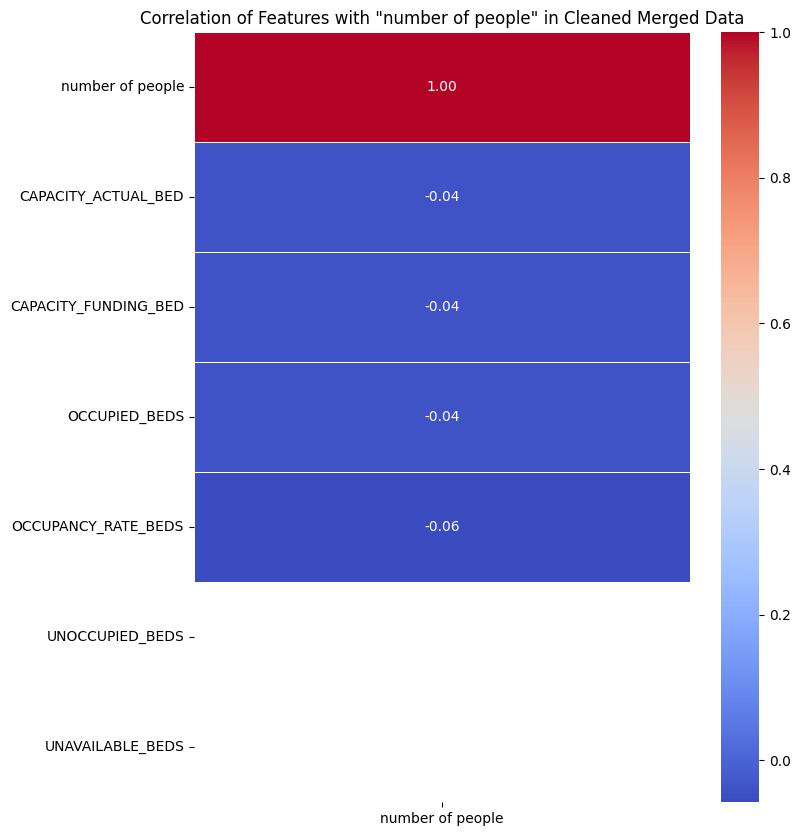


Note: The following columns had constant or near-constant values, which results in a NaN correlation coefficient: UNOCCUPIED_BEDS, UNAVAILABLE_BEDS


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the cleaned merged CSV file
df_combined_csv_cleaned = pd.read_csv('/content/cleaned_merged_shelter_time_series_data.csv')

# Convert 'Creation Date' to datetime, if not already done, to ensure it doesn't interfere with numeric correlation
df_combined_csv_cleaned['Creation Date'] = pd.to_datetime(df_combined_csv_cleaned['Creation Date'], errors='coerce')

# Check for constant columns that might lead to NaN correlations
constant_cols = []
for col in df_combined_csv_cleaned.select_dtypes(include='number').columns:
    if df_combined_csv_cleaned[col].nunique() <= 1 and col != 'number of people':
        constant_cols.append(col)
        print(f"Warning: Column '{col}' has only {df_combined_csv_cleaned[col].nunique()} unique value(s). Its correlation with other variables will be NaN.")

# Calculate the correlation matrix for the numeric columns
correlation_matrix_merged = df_combined_csv_cleaned.corr(numeric_only=True)

# Get the correlation of all features with 'number of people'
correlation_with_number_of_people_merged = correlation_matrix_merged[['number of people']].sort_values(by='number of people', ascending=False)

# Plotting the heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(correlation_with_number_of_people_merged, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation of Features with "number of people" in Cleaned Merged Data')
plt.yticks(rotation=0)
plt.show()

if constant_cols:
    print(f"\nNote: The following columns had constant or near-constant values, which results in a NaN correlation coefficient: {', '.join(constant_cols)}")

## Prepare Data for Time Series Analysis

Load the cleaned merged data from `/content/cleaned_merged_shelter_time_series_data.csv`, set 'Creation Date' as the index, and ensure the data is sorted by date.


In [11]:
import pandas as pd

# Load the cleaned merged CSV file, parsing 'Creation Date' as dates and setting it as the index
df_time_series_cleaned = pd.read_csv(
    '/content/cleaned_merged_shelter_time_series_data.csv',
    parse_dates=['Creation Date'],
    index_col='Creation Date'
)

# Sort the DataFrame by its index to ensure chronological order
df_time_series_cleaned.sort_index(inplace=True)

# Display the head and info of the prepared DataFrame
print("\nPrepared DataFrame Head:")
display(df_time_series_cleaned.head())
print("\nPrepared DataFrame Info:")
df_time_series_cleaned.info()


Prepared DataFrame Head:


,CAPACITY_ACTUAL_BED,CAPACITY_FUNDING_BED,OCCUPIED_BEDS,UNOCCUPIED_BEDS,UNAVAILABLE_BEDS,OCCUPANCY_RATE_BEDS,number of people
Creation Date,,,,,,,
2021-02-27,644.0,644.0,644.0,0.0,0.0,2100.0,6614.0
2021-02-28,792.0,792.0,792.0,0.0,0.0,2500.0,4323.0
2021-03-01,564.0,564.0,564.0,0.0,0.0,2300.0,2.0
2021-03-02,498.0,498.0,498.0,0.0,0.0,2400.0,7.0
2021-03-03,769.0,769.0,769.0,0.0,0.0,2800.0,4.0



Prepared DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1405 entries, 2021-02-27 to 2025-10-17
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CAPACITY_ACTUAL_BED   1405 non-null   float64
 1   CAPACITY_FUNDING_BED  1405 non-null   float64
 2   OCCUPIED_BEDS         1405 non-null   float64
 3   UNOCCUPIED_BEDS       1405 non-null   float64
 4   UNAVAILABLE_BEDS      1405 non-null   float64
 5   OCCUPANCY_RATE_BEDS   1405 non-null   float64
 6   number of people      1405 non-null   float64
dtypes: float64(7)
memory usage: 87.8 KB


## Calculate and Visualize Lagged Correlations

Calculate the lagged correlations for 'number of people' with other relevant shelter occupancy features (e.g., 'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS') for various lag periods (e.g., 1, 3, 7 days). Visualize these lagged correlations using line plots or heatmaps to identify potential delayed relationships.


Lagged Correlations:


,1,3,7,14,30,60,90
CAPACITY_ACTUAL_BED,-0.007882,0.209677,0.209552,0.221545,0.216678,0.237050,0.261246
CAPACITY_FUNDING_BED,-0.007882,0.209677,0.209552,0.221545,0.216678,0.237050,0.261246
OCCUPIED_BEDS,-0.007882,0.209677,0.209552,0.221545,0.216678,0.237050,0.261246
OCCUPANCY_RATE_BEDS,-0.024005,0.181394,0.184315,0.198577,0.193001,0.214154,0.235772


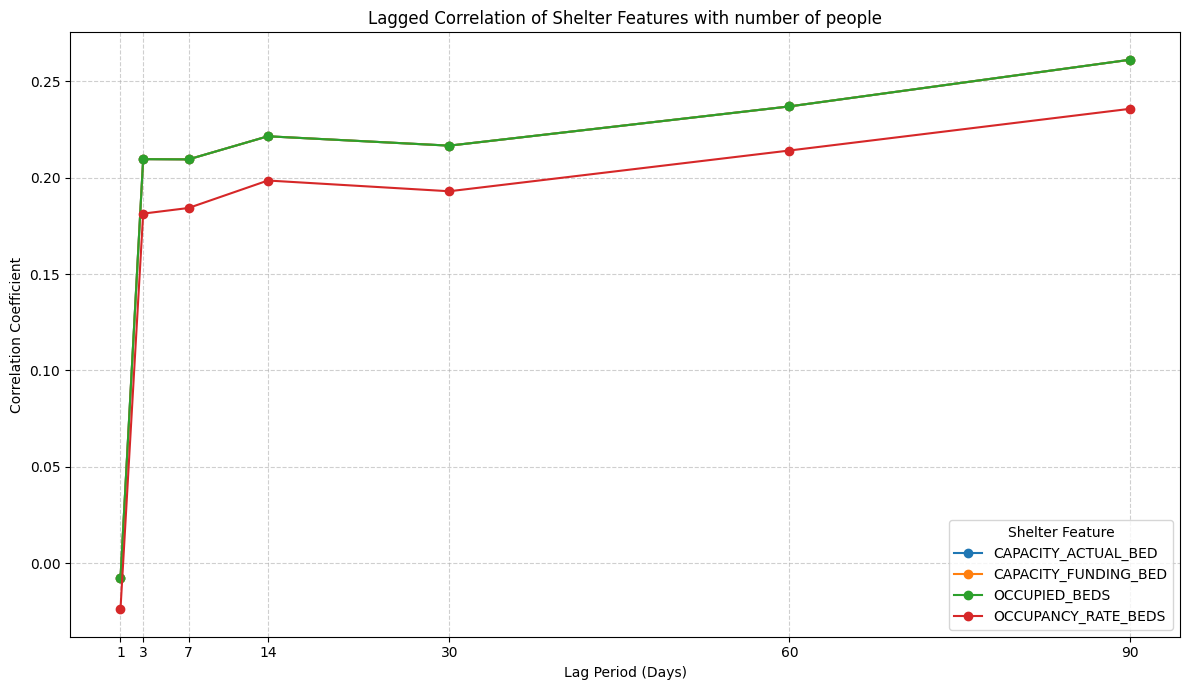

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the shelter occupancy features and the target variable
shelter_features = [
    'CAPACITY_ACTUAL_BED',
    'CAPACITY_FUNDING_BED',
    'OCCUPIED_BEDS',
    'OCCUPANCY_RATE_BEDS'
]
target_variable = 'number of people'

# Define the lag periods in days
lag_periods = [1, 3, 7, 14, 30, 60, 90]

# Initialize a DataFrame to store the lagged correlations
lagged_correlations = pd.DataFrame(index=shelter_features, columns=lag_periods, dtype=float)

# Iterate through each lag period
for lag in lag_periods:
    # Create a lagged version of the target variable
    # The negative shift moves future values into the current row, effectively lagging the target variable
    # If we want to see how current shelter features correlate with future 'number of people'
    # we should shift 'number of people' *backwards* in time, meaning positive shift on 'number of people'.
    # However, the common practice for lagged correlation (current X with past Y) is to shift X.
    # Given the prompt 'correlations for 'number of people' with other relevant shelter occupancy features',
    # it implies how shelter features at time t affect 'number of people' at time t+lag.
    # So, we lag the target variable 'number of people' relative to the features.
    df_lagged = df_time_series_cleaned.copy()
    df_lagged[f'{target_variable}_lagged'] = df_lagged[target_variable].shift(-lag)

    # Drop rows with NaN values introduced by shifting
    df_lagged_cleaned = df_lagged.dropna()

    # Calculate correlations for the current lag period
    for feature in shelter_features:
        if not df_lagged_cleaned[[feature, f'{target_variable}_lagged']].isnull().any().any():
            correlation = df_lagged_cleaned[feature].corr(df_lagged_cleaned[f'{target_variable}_lagged'])
            lagged_correlations.loc[feature, lag] = correlation
        else:
            lagged_correlations.loc[feature, lag] = None # Or np.nan if you imported numpy

# Display the resulting lagged correlations DataFrame
print("Lagged Correlations:")
display(lagged_correlations)

# Plotting the lagged correlations
plt.figure(figsize=(12, 7))

for feature in shelter_features:
    plt.plot(lagged_correlations.columns, lagged_correlations.loc[feature], marker='o', label=feature)

plt.title(f'Lagged Correlation of Shelter Features with {target_variable}')
plt.xlabel('Lag Period (Days)')
plt.ylabel('Correlation Coefficient')
plt.xticks(lag_periods) # Ensure all lag periods are shown on the x-axis
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Shelter Feature')
plt.tight_layout()
plt.show()

## Calculate and Visualize Moving Averages

Compute moving averages for the 'number of people' column and potentially other key features like 'OCCUPIED_BEDS' with different window sizes (e.g., 7-day and 30-day). Plot the original series alongside their moving averages to observe trends and smooth out short-term fluctuations.


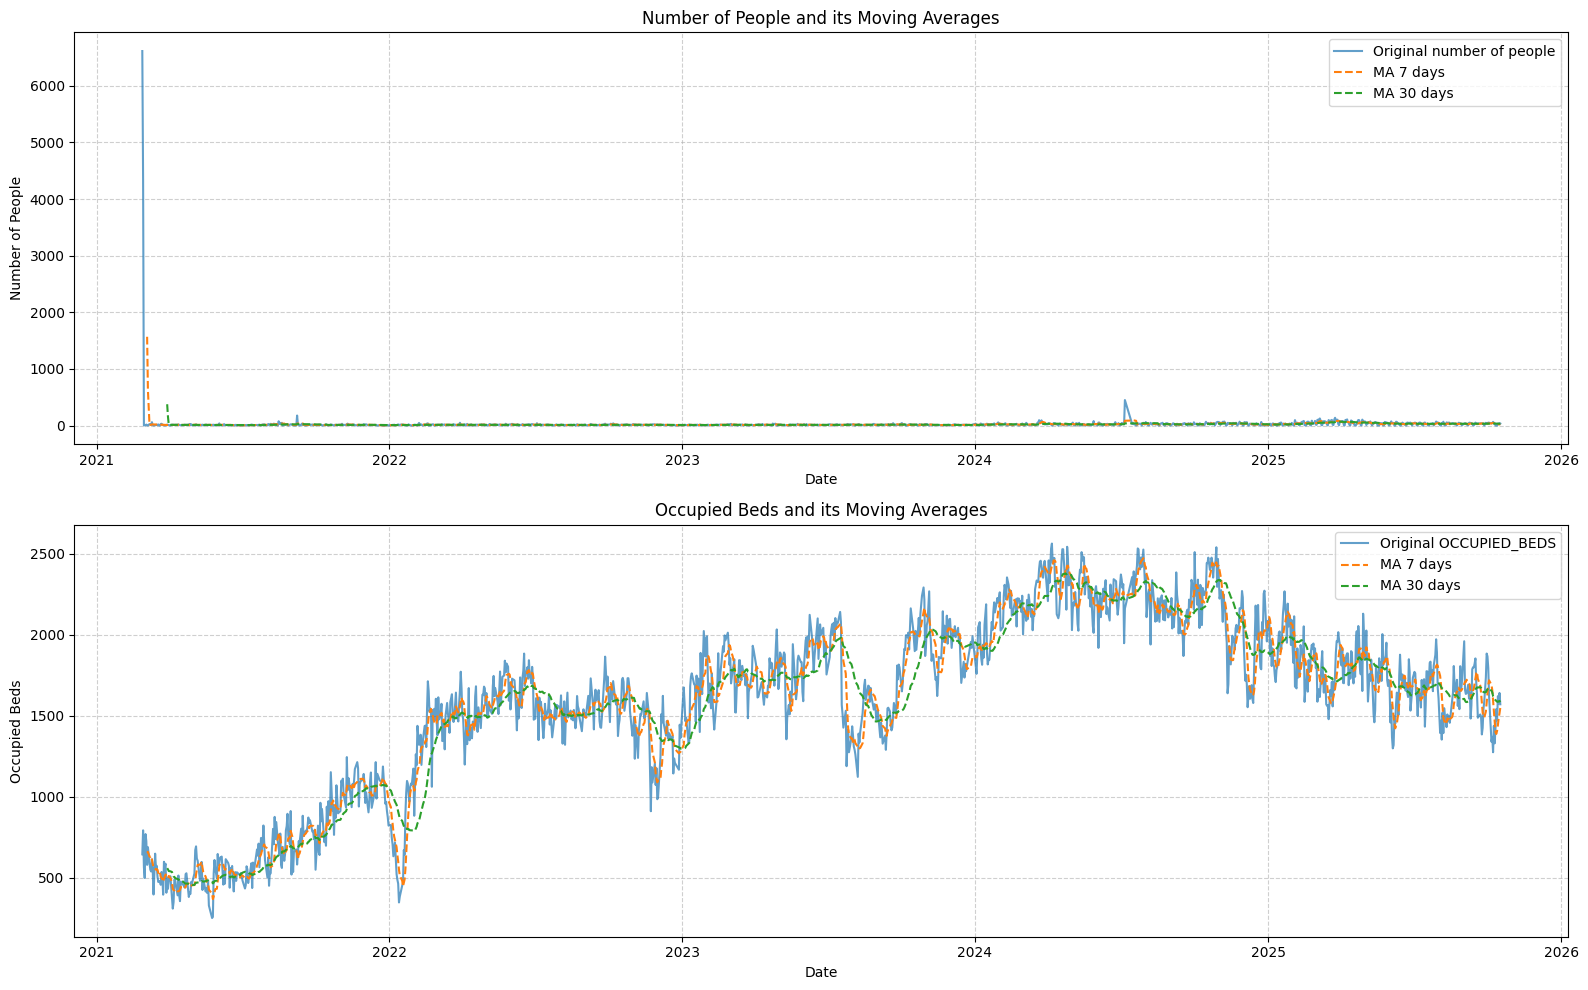

Moving averages calculated and plotted successfully.


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define window sizes for moving averages
window_sizes = [7, 30]

# Columns for which to calculate moving averages
columns_to_analyze = ['number of people', 'OCCUPIED_BEDS']

# Calculate moving averages and add them as new columns
for col in columns_to_analyze:
    for window in window_sizes:
        df_time_series_cleaned[f'{col}_MA_{window}_days'] = df_time_series_cleaned[col].rolling(window=window).mean()

# Plotting the original series and their moving averages
plt.figure(figsize=(16, 10))

# Plot for 'number of people'
plt.subplot(2, 1, 1) # 2 rows, 1 column, first plot
plt.plot(df_time_series_cleaned.index, df_time_series_cleaned['number of people'], label='Original number of people', alpha=0.7)
for window in window_sizes:
    plt.plot(df_time_series_cleaned.index, df_time_series_cleaned[f'number of people_MA_{window}_days'], label=f'MA {window} days', linestyle='--')
plt.title('Number of People and its Moving Averages')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Plot for 'OCCUPIED_BEDS'
plt.subplot(2, 1, 2) # 2 rows, 1 column, second plot
plt.plot(df_time_series_cleaned.index, df_time_series_cleaned['OCCUPIED_BEDS'], label='Original OCCUPIED_BEDS', alpha=0.7)
for window in window_sizes:
    plt.plot(df_time_series_cleaned.index, df_time_series_cleaned[f'OCCUPIED_BEDS_MA_{window}_days'], label=f'MA {window} days', linestyle='--')
plt.title('Occupied Beds and its Moving Averages')
plt.xlabel('Date')
plt.ylabel('Occupied Beds')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

print("Moving averages calculated and plotted successfully.")


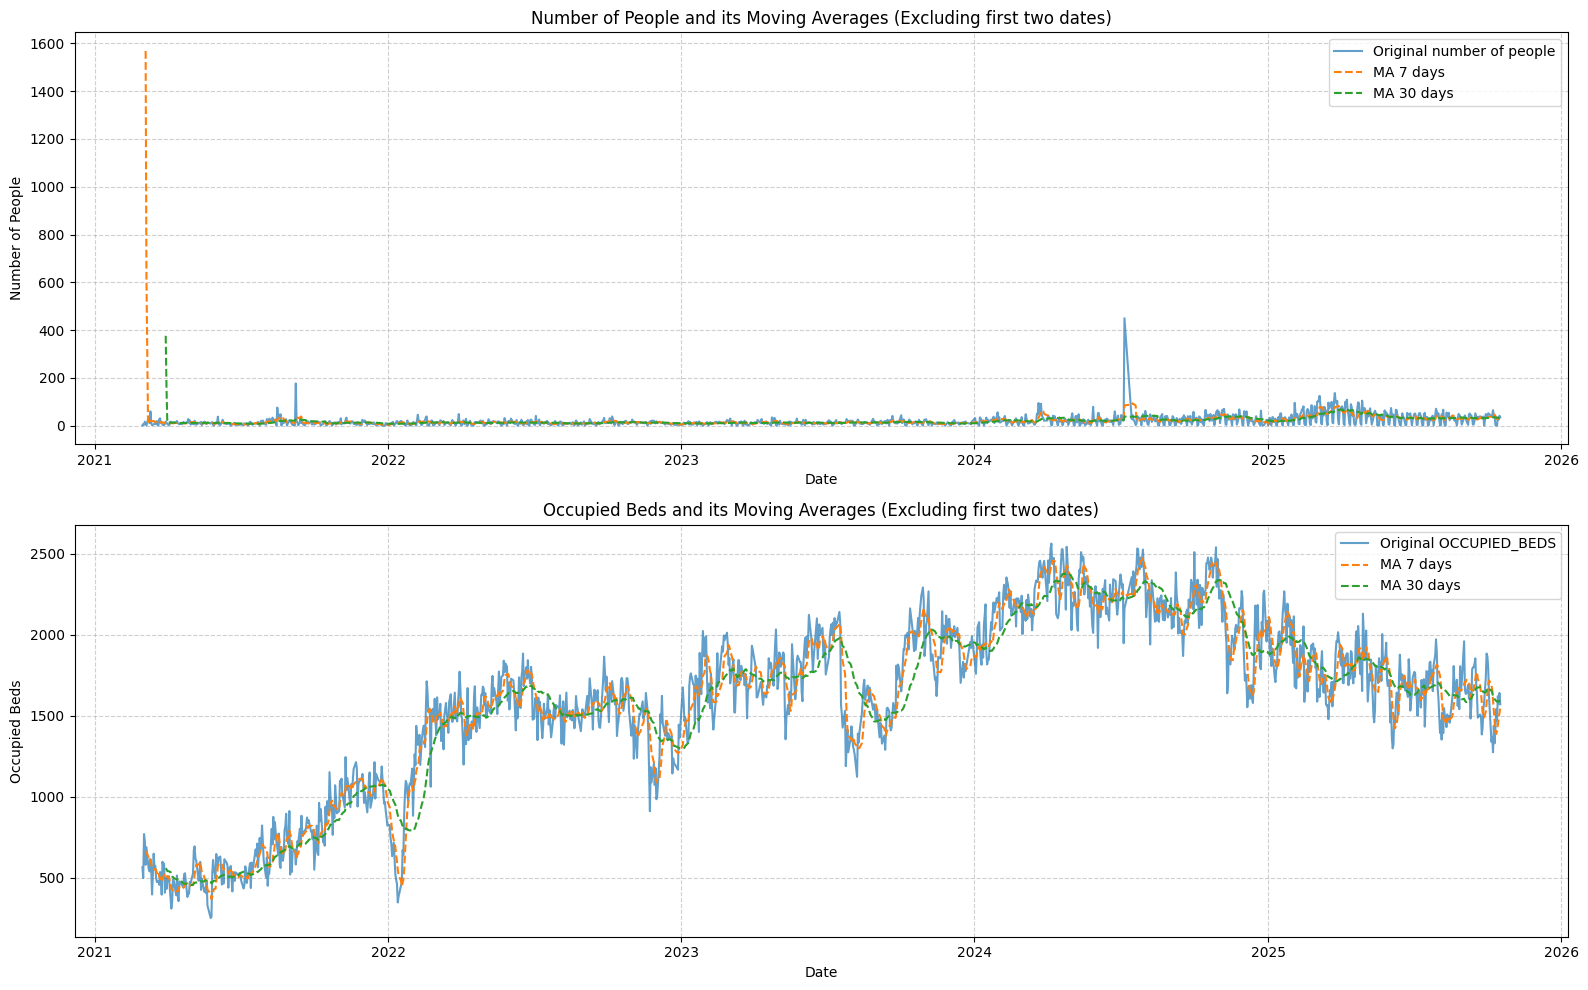

Moving averages calculated and plotted successfully, excluding the first two dates.


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define window sizes for moving averages
window_sizes = [7, 30]

# Columns for which to calculate moving averages
columns_to_analyze = ['number of people', 'OCCUPIED_BEDS']

# Calculate moving averages and add them as new columns
for col in columns_to_analyze:
    for window in window_sizes:
        # Ensure moving averages are recalculated as the previous cell's df_time_series_cleaned might be updated
        df_time_series_cleaned[f'{col}_MA_{window}_days'] = df_time_series_cleaned[col].rolling(window=window).mean()

# Plotting the original series and their moving averages, leaving out the first two rows
plt.figure(figsize=(16, 10))

# Plot for 'number of people'
plt.subplot(2, 1, 1) # 2 rows, 1 column, first plot
plt.plot(df_time_series_cleaned.index[2:], df_time_series_cleaned['number of people'].iloc[2:], label='Original number of people', alpha=0.7)
for window in window_sizes:
    plt.plot(df_time_series_cleaned.index[2:], df_time_series_cleaned[f'number of people_MA_{window}_days'].iloc[2:], label=f'MA {window} days', linestyle='--')
plt.title('Number of People and its Moving Averages (Excluding first two dates)')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Plot for 'OCCUPIED_BEDS'
plt.subplot(2, 1, 2) # 2 rows, 1 column, second plot
plt.plot(df_time_series_cleaned.index[2:], df_time_series_cleaned['OCCUPIED_BEDS'].iloc[2:], label='Original OCCUPIED_BEDS', alpha=0.7)
for window in window_sizes:
    plt.plot(df_time_series_cleaned.index[2:], df_time_series_cleaned[f'OCCUPIED_BEDS_MA_{window}_days'].iloc[2:], label=f'MA {window} days', linestyle='--')
plt.title('Occupied Beds and its Moving Averages (Excluding first two dates)')
plt.xlabel('Date')
plt.ylabel('Occupied Beds')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

print("Moving averages calculated and plotted successfully, excluding the first two dates.")

### Data Analysis Key Findings

*   **Data Preparation:** The time series data was successfully loaded, with 'Creation Date' set as the index and sorted chronologically, ensuring readiness for time series analysis.
*   **Lagged Correlations with 'number of people':**
    *   **Increasing Correlation with Lag:** Most shelter features showed an increase in correlation with 'number of people' as the lag period increased. For example, 'CAPACITY_ACTUAL_BED' exhibited a correlation of -0.007882 at a 1-day lag, which rose significantly to 0.261246 at a 90-day lag.
    *   **Feature Redundancy/Interdependence:** 'CAPACITY_ACTUAL_BED', 'CAPACITY_FUNDING_BED', and 'OCCUPIED_BEDS' displayed nearly identical lagged correlation patterns across all examined periods, suggesting strong collinearity or similar underlying dynamics with respect to 'number of people'.
*   **Moving Averages for Trend Identification:**
    *   Moving averages with 7-day and 30-day window sizes were successfully computed and plotted for both 'number of people' and 'OCCUPIED_BEDS'.
    *   The plots effectively demonstrated how moving averages smooth out short-term fluctuations, making longer-term trends in both the 'number of people' and 'OCCUPIED_BEDS' time series more apparent.


*   Given the high similarity in lagged correlation patterns among 'CAPACITY_ACTUAL_BED', 'CAPACITY_FUNDING_BED', and 'OCCUPIED_BEDS', it might be beneficial to select just one of these highly correlated features for future modeling to avoid multicollinearity while retaining predictive power.
